In [ ]:
!pip install pandas
!pip install spicy
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = '/content/IPM.csv'
data = pd.read_csv('/content/IPM.csv')
data

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

In [ ]:
data.describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418
std,1.312967,2664.738311,1.611256,3.437536
min,2.950000,3975.000000,0.850000,54.820000
25%,12.350000,8599.750000,7.390000,67.210000
50%,12.860000,10192.500000,8.180000,69.785000
75%,13.570000,11670.500000,9.180000,71.712500
max,17.800000,23888.000000,12.830000,77.730000


In [ ]:
data.nunique()

Harapan_Lama_Sekolah      499
Pengeluaran_Perkapita    1930
Rerata_Lama_Sekolah       633
Usia_Harapan_Hidup       1054
IPM                         4
dtype: int64

In [ ]:
data_ipm = data[['IPM']]
data_ipm

,IPM
0,High
1,Normal
2,Normal
3,Normal
4,Normal
...,...
2191,Low
2192,Low
2193,Low
2194,High


Error terletak pada line 1. Pesan error ini mengindikasikan bahwa 'Series' object (yang dipanggil sebagai data_ipm) tidak memiliki atribut 'columns'. Ini menunjukkan bahwa data_ipm bukan DataFrame melainkan sebuah Series.

Solusinya, pastikan variabel data_ipm diisi dengan sebuah DataFrame, bukan Series. Anda dapat menggunakan metode pandas.read_csv() atau pandas.DataFrame() untuk mengkonversi data menjadi DataFrame jika belum dalam bentuk DataFrame. Pastikan juga untuk mengimpor pandas di awal kode dengan menggunakan perintah: import pandas as pd.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [ ]:
for i in data_ipm.columns:
  print(data_ipm[i].unique())

['High' 'Normal' 'Very-High' 'Low']


# Data Visualization

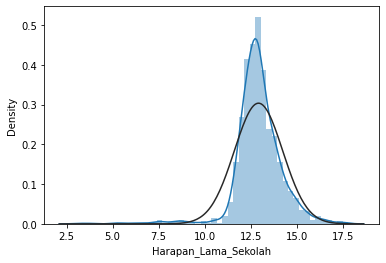

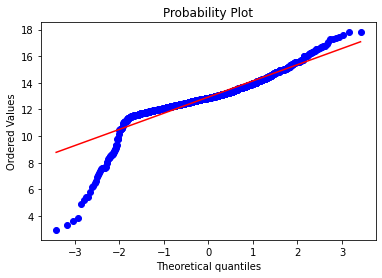

In [ ]:
sns.distplot(data['Harapan_Lama_Sekolah'],fit=norm);
fig = plt.figure()
res = stats.probplot(data['Harapan_Lama_Sekolah'], plot=plt)

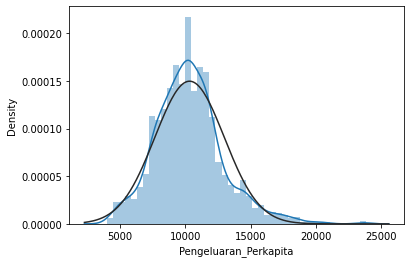

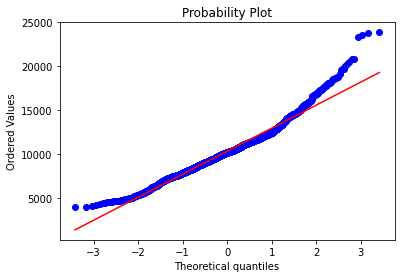

In [ ]:
sns.distplot(data['Pengeluaran_Perkapita'],fit=norm);
fig = plt.figure()
res = stats.probplot(data['Pengeluaran_Perkapita'], plot=plt)

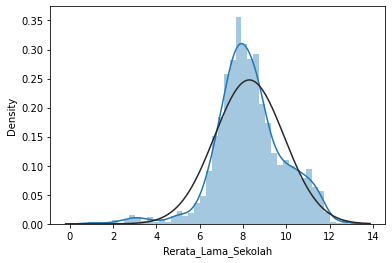

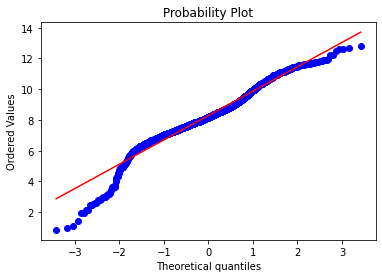

In [ ]:
sns.distplot(data['Rerata_Lama_Sekolah'],fit=norm);
fig = plt.figure()
res = stats.probplot(data['Rerata_Lama_Sekolah'], plot=plt)

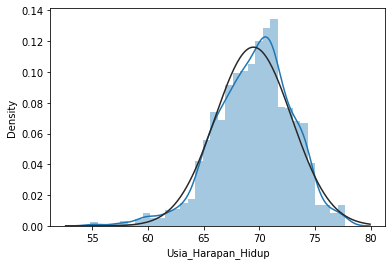

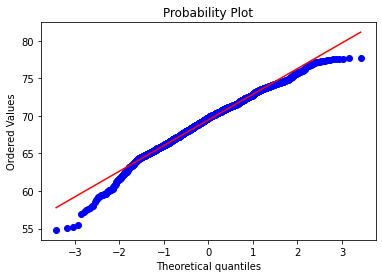

In [ ]:
sns.distplot(data['Usia_Harapan_Hidup'],fit=norm);
fig = plt.figure()
res = stats.probplot(data['Usia_Harapan_Hidup'], plot=plt)

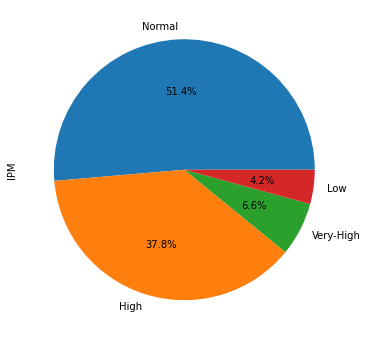

In [ ]:
for i in data_ipm.columns:
  plt.figure(figsize=(15,6))
  data_ipm[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
for i in data_ipm.columns:
  print(data_ipm[i].value_counts())

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64


# Preprocessing Data

Random Forest Clasification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(['IPM'],axis=1)
y = data['IPM']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.27, random_state = 48)
X_train.shape, X_test.shape

((1603, 4), (593, 4))

In [ ]:
classifier_rf = RandomForestClassifier(n_estimators=15, criterion="entropy")
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15)

In [ ]:
y_pred = classifier_rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[218   0   5   1]
 [  0  22   2   0]
 [ 16   0 287   0]
 [  2   0   0  40]]


In [ ]:
print('training-set accuracy score:', classifier_rf.score(X_train, y_train))
print('testing-set accuracy score:', classifier_rf.score(X_test, y_test))

training-set accuracy score: 1.0
testing-set accuracy score: 0.9561551433389545


Data Balancing

In [ ]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()

In [ ]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [ ]:
classifier_rf2 = RandomForestClassifier(n_estimators=15, criterion="entropy")
classifier_rf2.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(criterion='entropy', n_estimators=15)

In [ ]:
y_pred = classifier_rf2.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[219   0   4   1]
 [  0  22   2   0]
 [ 14   0 289   0]
 [  1   0   0  41]]


In [ ]:
print('training-set accuracy score:', classifier_rf2.score(X_train, y_train))
print('testing-set accuracy score:', classifier_rf2.score(X_test, y_test))

training-set accuracy score: 1.0
testing-set accuracy score: 0.9629005059021922


Adaboost Clasification

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ABclassifier = AdaBoostClassifier(n_estimators=100)

ABclassifier.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_AB = ABclassifier.predict(X_test)

In [ ]:
print('training-set accuracy score:', ABclassifier.score(X_train_SMOTE, y_train_SMOTE))
print('testing-set accuracy score:', ABclassifier.score(X_test, y_test))

training-set accuracy score: 0.519090909090909
testing-set accuracy score: 0.5059021922428331
